<a href="https://colab.research.google.com/github/AndiSulaehah/UTS-AVD/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data yang diperlukan

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

Membaca file csv

In [3]:
df = pd.read_csv('Spotify_2024_Global_Streaming_Data.csv')
df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2022,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


menampilkan ringkasan informasi dari DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

memilih fitur dan target


In [5]:
features = [
    'Release Year',
    'Monthly Listeners (Millions)',
    'Total Hours Streamed (Millions)',
    'Avg Stream Duration (Min)',
    'Skip Rate (%)'
]


X = df[features]
y = df['Total Streams (Millions)']

print("Fitur (X):", X.shape)
print("Target (y):", y.shape)

Fitur (X): (500, 5)
Target (y): (500,)


Bersihkan data: hapus baris yang mengandung NaN di kolom penting

In [10]:
df_clean = df.dropna(subset=features + ['Total Streams (Millions)'])

Split Data

In [14]:
X = df_clean[features]
y = df_clean['Total Streams (Millions)']

normaliasaikan

In [15]:
from sklearn.preprocessing import StandardScaler

# Normalisasi setelah cleaning
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gunakan X_scaled sebagai input ke split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (400, 5)
X_test: (100, 5)
y_train: (400,)
y_test: (100,)


data training dan data testing

In [16]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 5) (400,)
Test set: (100, 5) (100,)


Training model KNN

In [17]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

prediksi knn

In [18]:
y_pred = knn.predict(X_test)

Evaluasi Model

In [19]:
print("Evaluasi KNN Regressor")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):,.2f}")
print(f"Mean Absolute Error(MAE)): {mean_absolute_error(y_test, y_pred):,.2f}")

Evaluasi KNN Regressor
R² Score: 0.8260
Mean Squared Error (MSE): 369,088.62
Mean Absolute Error(MAE)): 497.47


1.   **R² = 82.6% variasi dari data target (Total Streams) berhasil dijelaskan oleh model. Sisanya (17.4%) adalah variasi yang tidak dijelaskan, bisa disebabkan oleh noise, fitur yang kurang, atau keterbatasan model KNN itu sendiri.**
2.   **Mean Squared Error (MSE) Rata-rata selisih kuadrat antara prediksi dan nilai sebenarnya adalah sekitar 369.089 juta (dalam satuan kuadrat karena MSE).**
3.   **Mean Absolute Error (MAE): 497.47 Rata-rata kesalahan prediksi adalah sekitar 497.47 juta stream per data point**

visualisasi plot

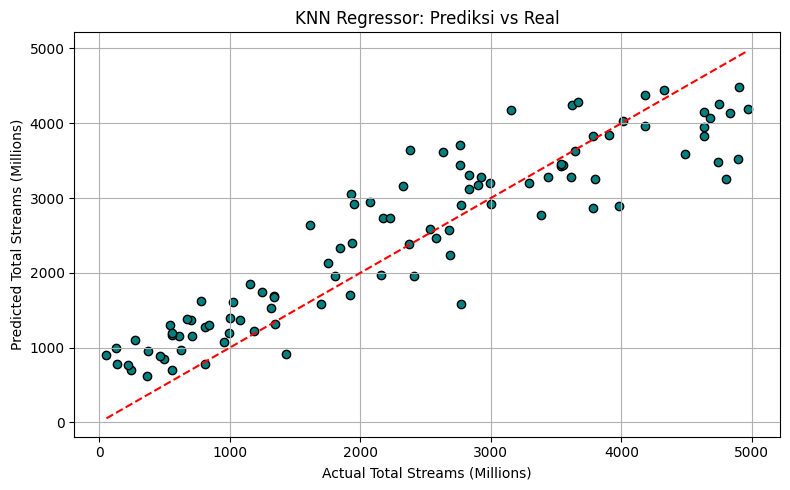

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='teal', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Total Streams (Millions)")
plt.ylabel("Predicted Total Streams (Millions)")
plt.title("KNN Regressor: Prediksi vs Real")
plt.grid(True)
plt.tight_layout()
plt.show()

**Sumbu X: Nilai asli (actual total streams) – artinya data sebenarnya.
Sumbu Y: Nilai prediksi model (predicted total streams).
Titik-titik hitam: Hasil prediksi dari model dibandingkan dengan nilai aslinya. Garis merah putus-putus: Garis referensi
𝑦
=
𝑥
y=x, yaitu garis yang menunjukkan posisi ideal di mana prediksi = aktual.**

In [21]:
residuals = y_test - y_pred

visualisasi histogram residuals dan frequency model KNN

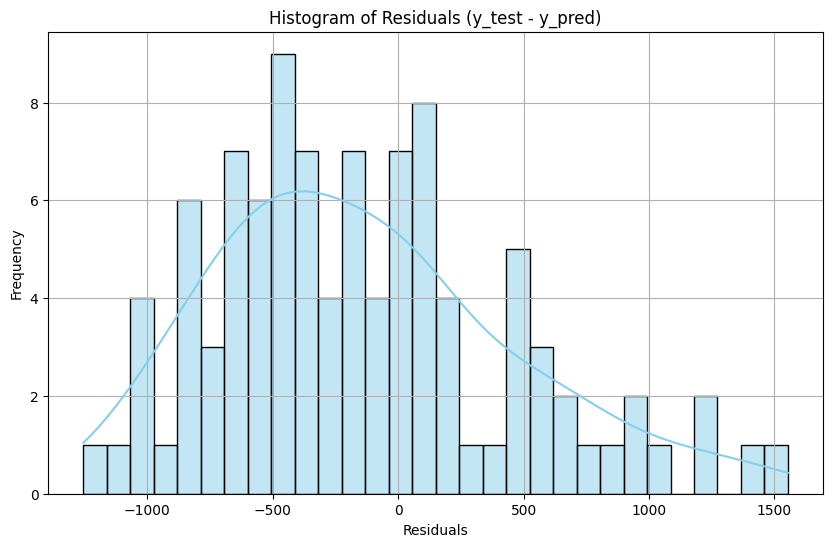

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.title('Histogram of Residuals (y_test - y_pred)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

1. **Distribusi residual relatif simetris terhadap angka nol
Ini menunjukkan bahwa model tidak memiliki bias sistematis (tidak cenderung selalu overestimasi atau underestimasi).**
2. **Mayoritas residual berada di kisaran -750 hingga +750 juta streams
Artinya, sebagian besar prediksi memiliki kesalahan relatif kecil, dan model cukup stabil dalam memprediksi total streams.**
3. **Terdapat beberapa outlier (ekor kiri dan kanan panjang)
Ini menunjukkan bahwa terdapat beberapa lagu dengan kesalahan prediksi yang besar. Biasanya terjadi pada lagu-lagu yang sangat viral atau sangat kurang populer, yang sulit diprediksi.**